### Customer Segmentation and Analysis
Steps to solve the problem :

- Importing Libraries.
- Exploration of data.
- Data Visualization.
- Clustering using K-Means|Analysis
- Selection of Clusters.
- Ploting the Cluster Boundry and Clusters.
- 3D Plot of Clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

- 5 columns and 200 rows of data in a dataset

In [5]:
df.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

- to know if there are null values in dataset
- False, that means no null values for all 5 columns in a dataset
- What if there are null values in a dataset???

In [6]:
# you can rename columns

df.rename(columns = {'Spending Score (1-100)':'Spending Score'}, inplace=True)
df.rename(columns={"Annual Income (k$)": 'Annual Income'}, inplace=True)

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- As there were no null values in a dataset, 
- separate the dataset into features(X) and labels(y).

In [8]:
y = df['Spending Score'] # small y
X = df.drop(columns='Spending Score') # capital X

In [9]:
# only spending score column
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score, Length: 200, dtype: int64

In [10]:
# has rest except Spending Score column
X 

,CustomerID,Genre,Age,Annual Income
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


- import the train_test_split method from the sklearn.model_selection module 
- to split my data into training and testing sets. 
- split of 20%.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

- if you use a particular value for random_state (random_state = 1 or any other value) 
- everytime the result will be same,i.e, same values in train and test datasets.
- Doesn't matter how many times you run the code, the output will be same.
- Try to remove the random_state and run the code, output will be different each time you execute the code.
- So, when you run the program multiple times you might see different train/test data points and the behavior will be unpredictable.
- randomstate is basically used for reproducing your problem the same every time it is run.
- This means that one random_state value has a fixed dataset, so every time we run the code with random_state value 1, it will produce the same splitting datasets.

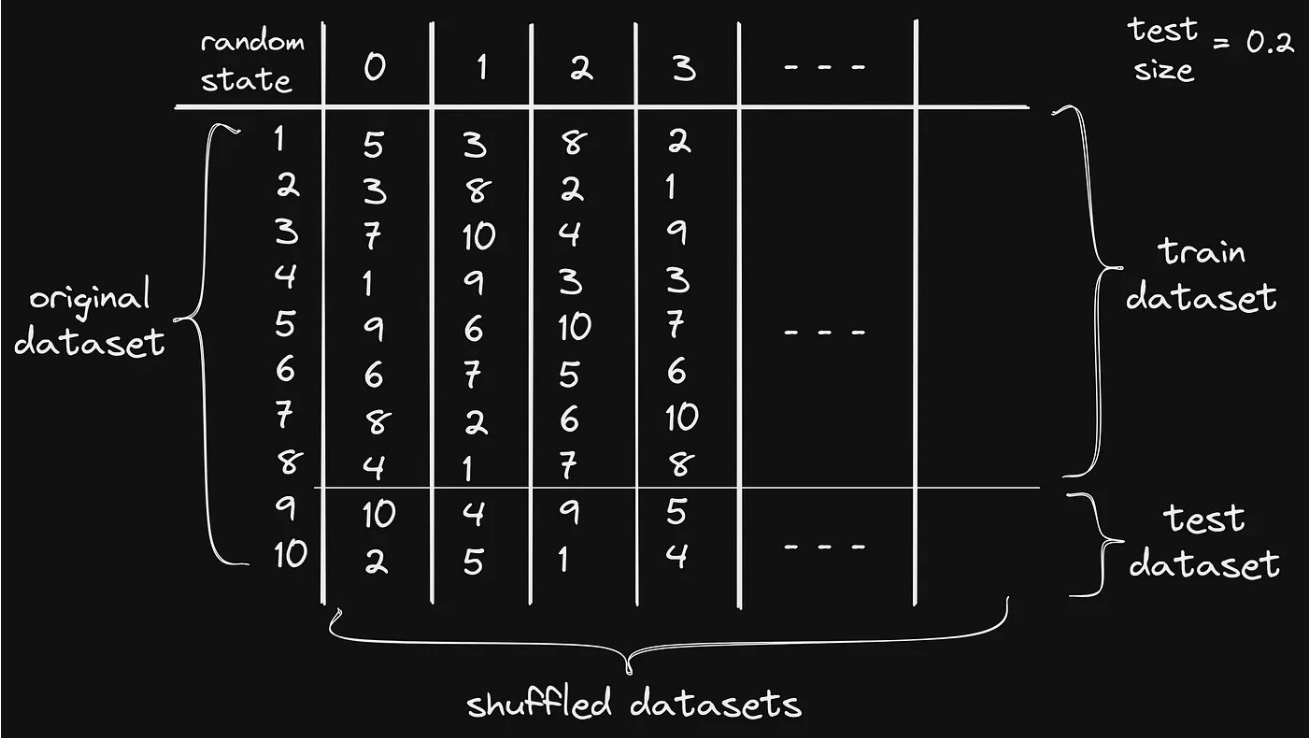

In [12]:
X_train.shape, y_train.shape # ((160, 4), (160,))

((160, 4), (160,))

In [13]:
X_test.shape, y_test.shape # ((40, 4), (40,))

((40, 4), (40,))

In [14]:
X_train

,CustomerID,Genre,Age,Annual Income
97,98,Female,27,60
174,175,Female,52,88
138,139,Male,19,74
67,68,Female,68,48
175,176,Female,30,88
...,...,...,...,...
95,96,Male,24,60
32,33,Male,53,33
124,125,Female,23,70
131,132,Male,39,71


- In a dataset, there is one categorical column — Gender
- Before feeding to a machine-learning model, we need to convert the categorical column to a numerical column.
- so use Label Encoder for the conversion.

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [16]:
X_train['Genre'] = labelencoder.fit_transform(X_train['Genre'])
X_test['Genre'] = labelencoder.fit_transform(X_test['Genre'])

In [17]:
X_train

,CustomerID,Genre,Age,Annual Income
97,98,0,27,60
174,175,0,52,88
138,139,1,19,74
67,68,0,68,48
175,176,0,30,88
...,...,...,...,...
95,96,1,24,60
32,33,1,53,33
124,125,0,23,70
131,132,1,39,71


- Genre converted into numerical data in 0 and 1

### Now apply algorithm

- Support Vector Regression Model SVM

In [21]:
from sklearn import svm

svm_model = svm.SVR()

svm_model.fit(X_train, y_train)

svm_prediction = svm_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error

svm_mae = mean_absolute_error(y_test, svm_prediction)
svm_mae # 20.66 (Bad!)

21.66895201510343

- Decision Tree Regressor Model.

In [23]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

dt_prediction = dt_model.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_prediction)

dt_mae # 20.27 (Bad!)

20.275

# Data visualization

In [36]:
plt.style.use('fivethirtyeight')

- Histograms

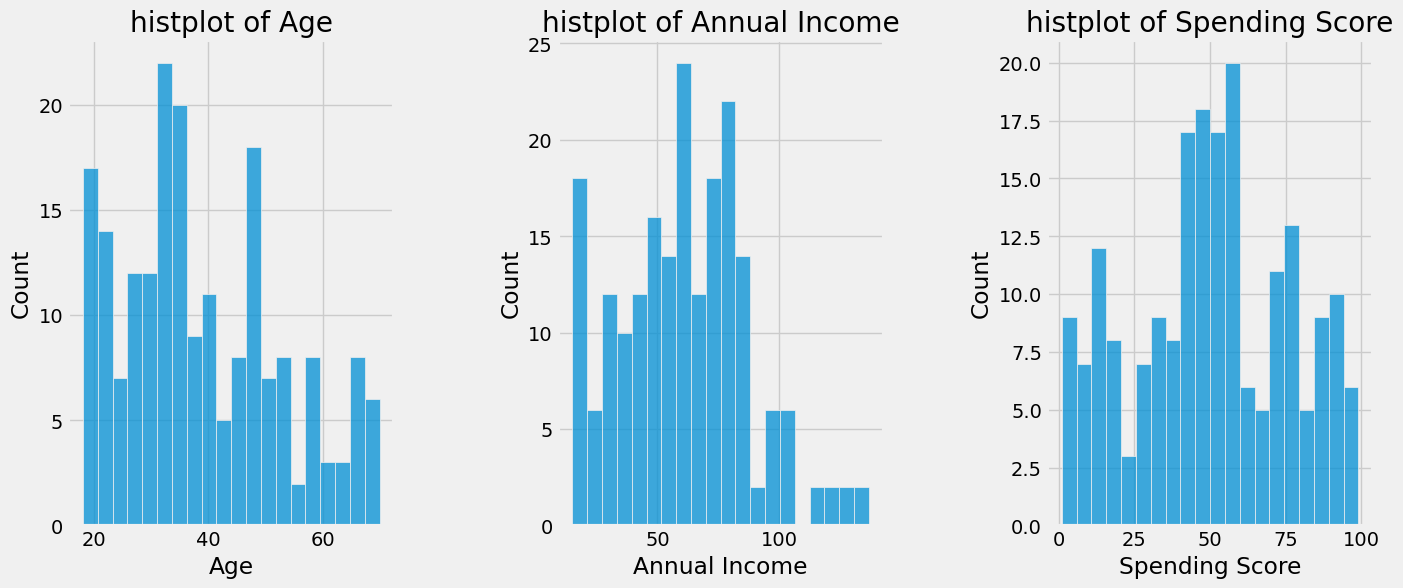

In [37]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age', 'Annual Income', 'Spending Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('histplot of {}'.format(x))
plt.show()

- count plot of gender

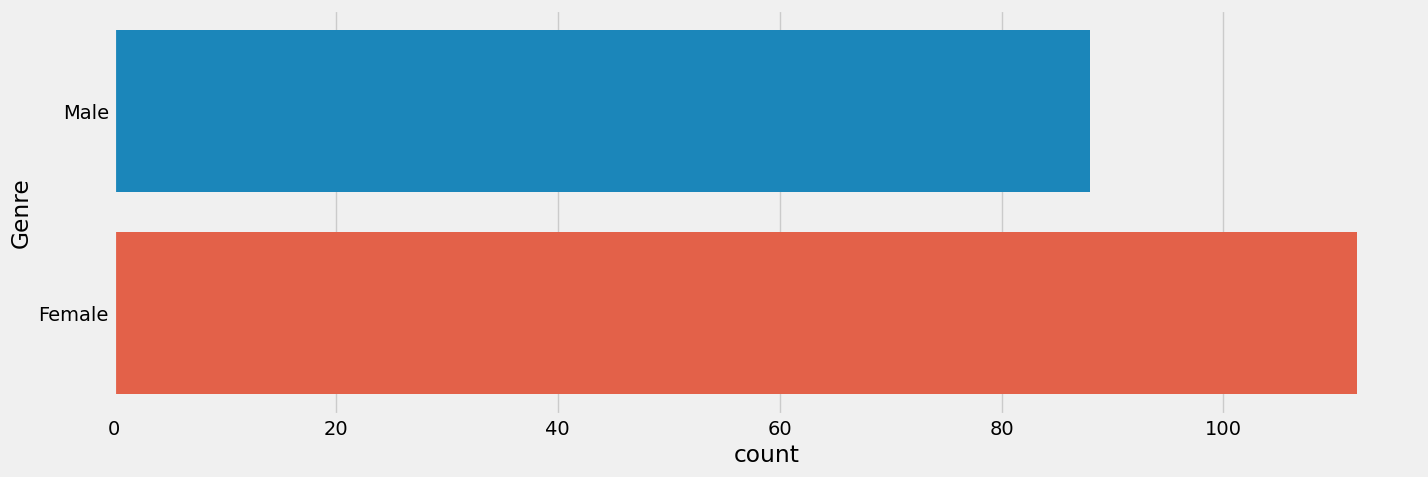

In [35]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Genre' , data = df)
plt.show()

- Ploting the Relation between Age, Annual Income and Spending Score

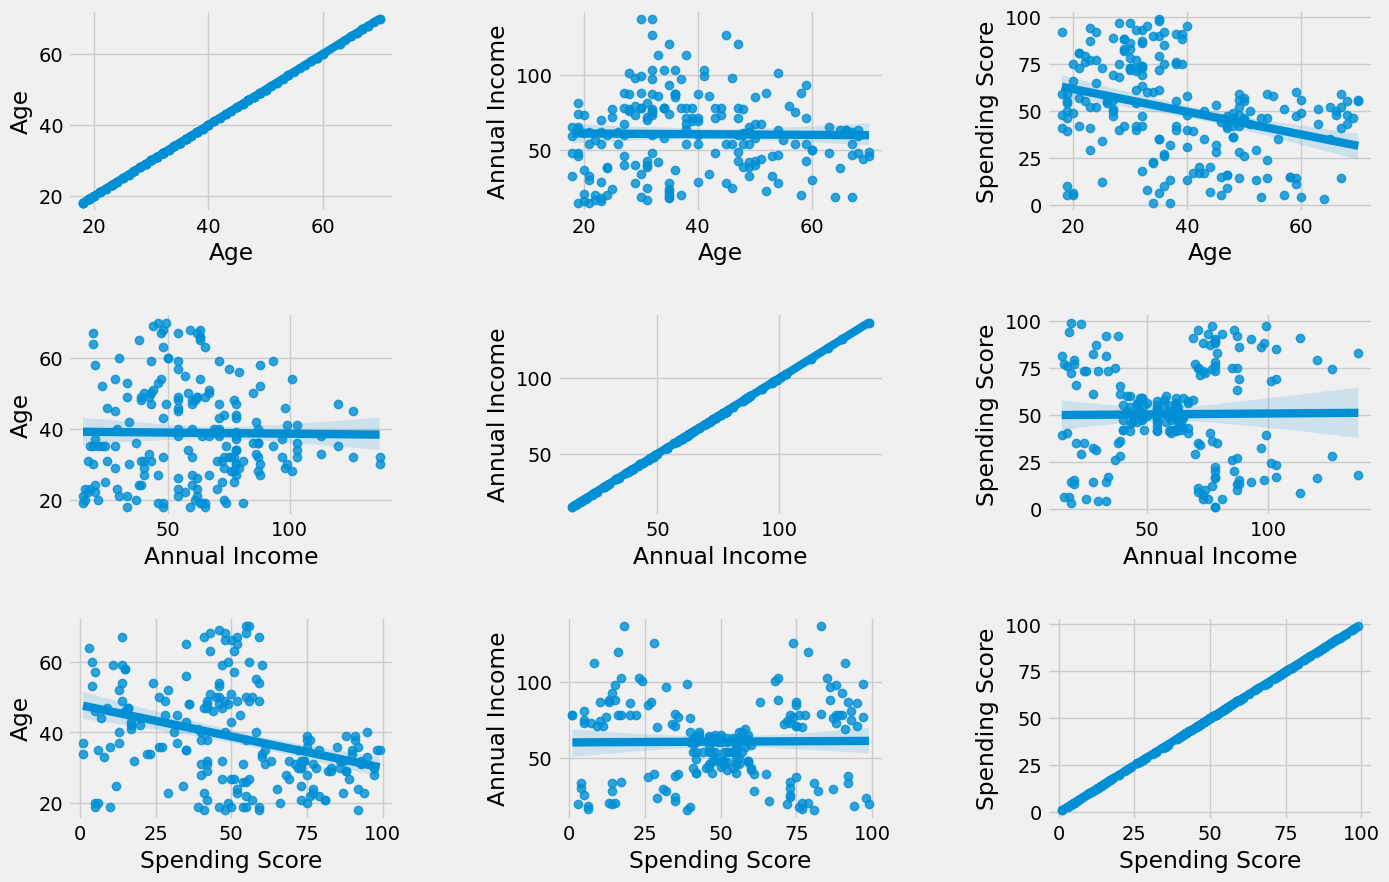

In [44]:
plt.figure(1 , figsize = (15 , 10))
n = 0 
for x in ['Age', 'Annual Income', 'Spending Score']:
    for y in ['Age', 'Annual Income', 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

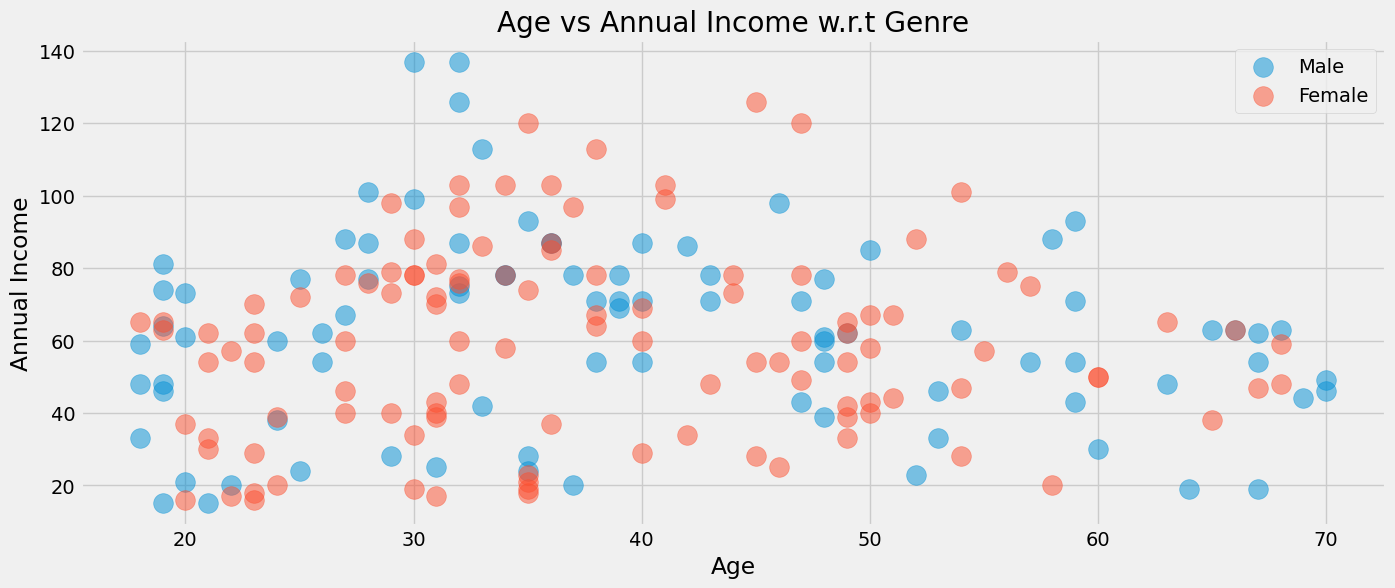

In [46]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income' , data = df[df['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income') 
plt.title('Age vs Annual Income w.r.t Genre')
plt.legend()
plt.show()

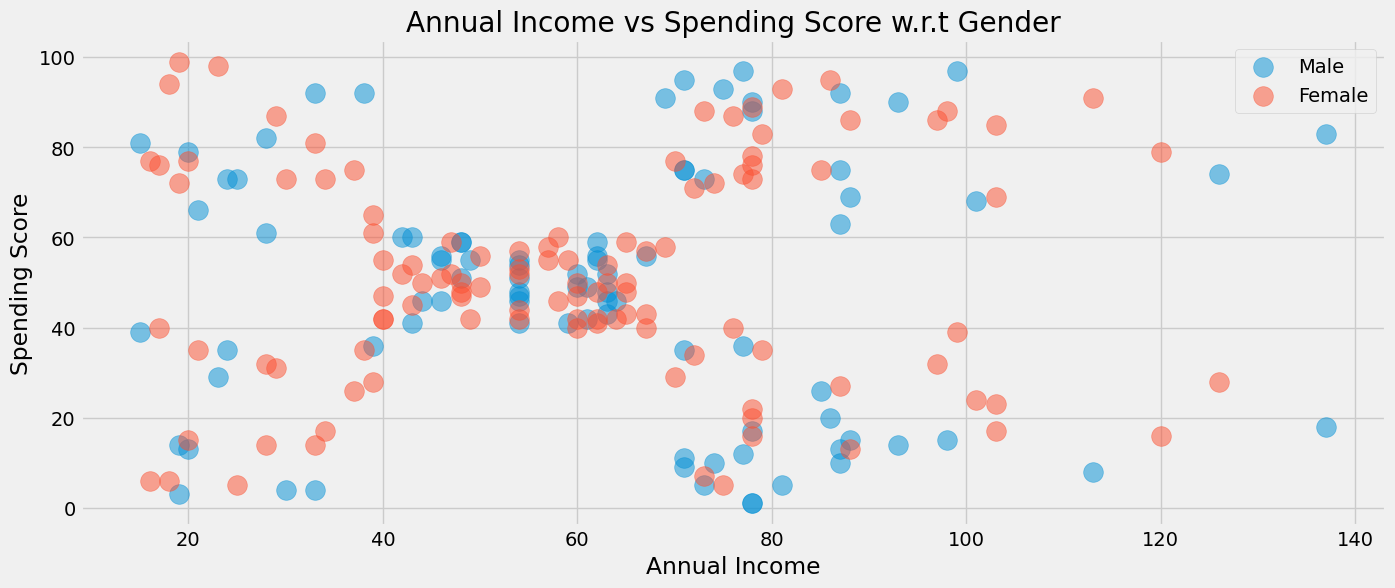

In [47]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income',y = 'Spending Score' ,
                data = df[df['Genre'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income'), plt.ylabel('Spending Score') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

- Distribution of values in Age , Annual Income and Spending Score according to Gender

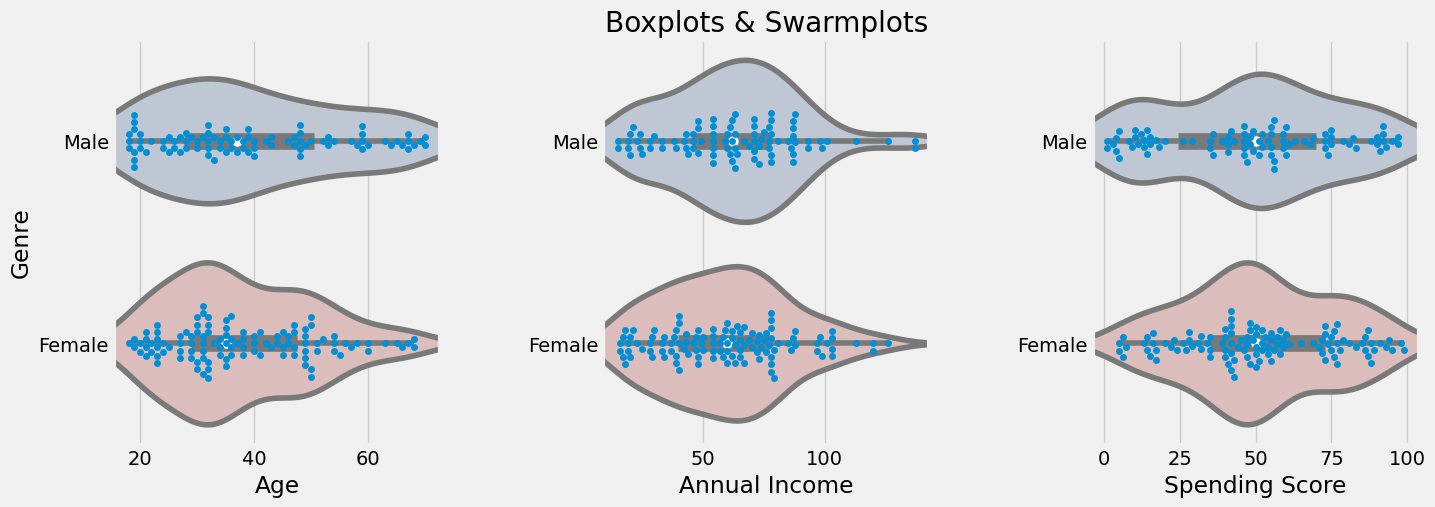

In [67]:
plt.figure(1 , figsize = (15 , 5))
n = 0 
for cols in ['Age' , 'Annual Income' , 'Spending Score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Genre' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Genre' , data = df)
    plt.ylabel('Genre' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

In [74]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

## Clustering using K- means

In [75]:
X3 = df[['Age' , 'Annual Income' ,'Spending Score']].iloc[: , :].values

In [77]:
X3 = df[['Age' , 'Annual Income' ,'Spending Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [78]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

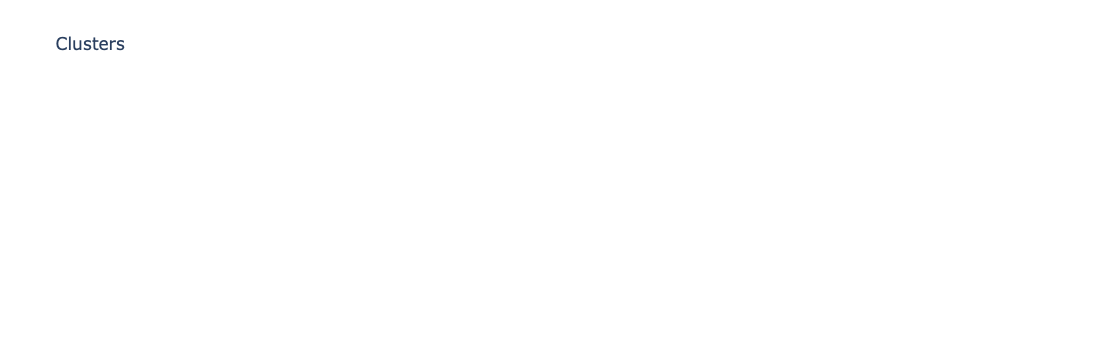

In [101]:

df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score'],
    z= df['Annual Income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 5,
        line=dict(
            color= df['label3'],
            width= 10
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(

    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [93]:
# Segmentation using Age and Spending Score

'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [94]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [95]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

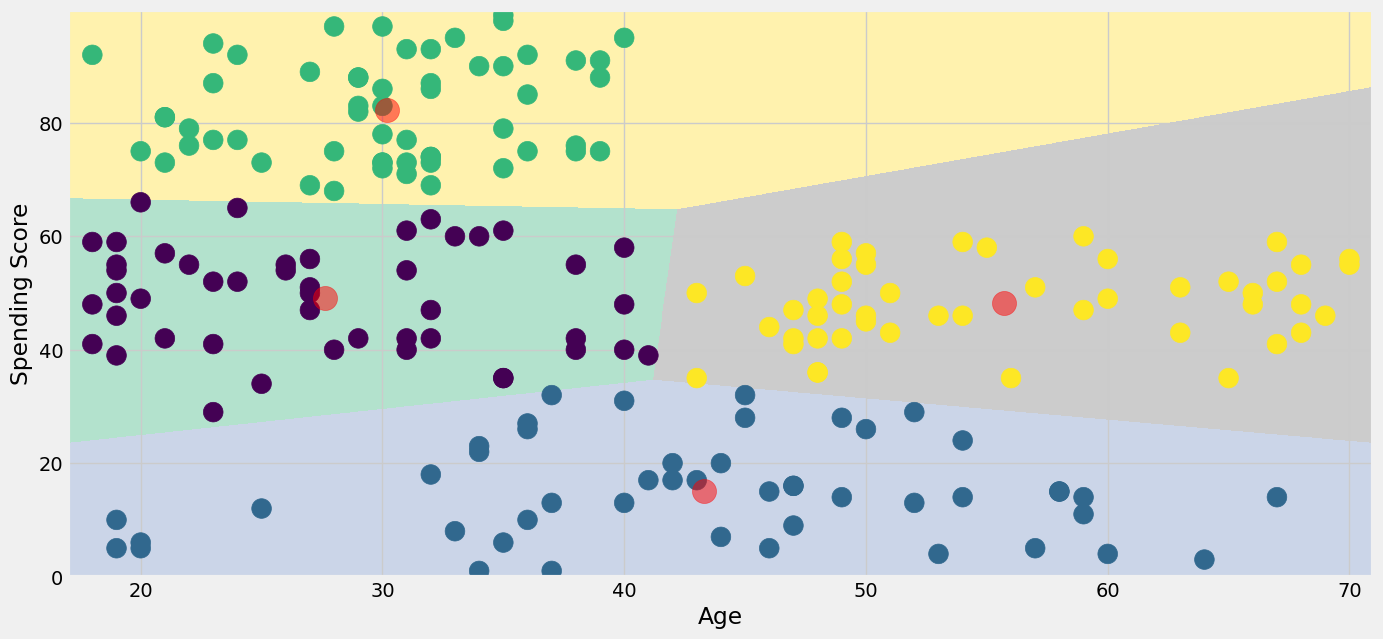

In [98]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Age')
plt.show()

Visualization of data is a very important step it can tell many details about a feature or a variable before you approach building a model for prediction it is very important to understand the data well. Even though you are doing practice or for a business, you have to understand the data well, so it a better approach to knowing your data.

In [106]:
# -------------------- ----------------- ----------------- ----------------- ----------------- ----------------- #

### Objective: To apply k-means clustering algorihm to segment the customers for decision making

#### K-means Algorithms
In Machine Learning, the types of Learning can broadly be classified into three types:

- Supervised Learning: having labelled dataset
- Unsupervised Learning: dataset without labels
- Re-inforcement learning
Predicting new data points based on example is called “supervised learning whereas categorizing data into buckets is termed “unsupervised learning”.

#### An Example of Supervised Learning,
- suppose we have a pizza chain and we’ve been tasked with creating a feature in the order management software that will predict delivery times for customers. In order to achieve this, we are given a dataset that has delivery times, distances traveled, day of week, time of day, staff on hand, and volume of sales for several deliveries in the past. From this data, we can make predictions on future delivery times. This is a good example of supervised learning.

#### An Example of Unsupervised Learning,
- Now, let’s say the pizza chain wants to send out targeted coupons to customers. It wants to segment its customers into 4 groups: large families, small families, singles, and college students. We are given prior ordering data (e.g. size of order, price, frequency, etc) and we’re tasked with putting each customer into one of the four buckets. This would be an example of “unsupervised learning” since we’re not making predictions; we’re merely categorizing the customers into groups.

#### Clustering defined

- Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a metric that reflects the strength of relationship between two data objects.

#### Application of Clustering

Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as:

- machine learning
- Text Analytics
- pattern recognition
- image analysis
- information retrieval
- bio-informatics
- data compression
- computer graphics, etc.


#### Types of clustering include

- connectivity
- centroid
- distribution
- density

#### K-means Algorithm
K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.